In [2]:
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14,14)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True

matplotlib.rcParams['axes.unicode_minus'] = False 
from datetime import datetime 
today = datetime.strftime(datetime.today(),"%Y-%m-%d")
    

In [3]:
import yfinance as yf
# Request historical data for past 5 years
df = yf.download("^GSPC", start='2021-01-01', end=today)
df.columns = [i.replace(" ", "_") for i in list(df)]



[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2020-12-31,3733.270020,3760.199951,3726.879883,3756.070068,3756.070068,3172510000
2021-01-04,3764.610107,3769.989990,3662.709961,3700.649902,3700.649902,5006680000
2021-01-05,3698.020020,3737.830078,3695.070068,3726.860107,3726.860107,4582620000
2021-01-06,3712.199951,3783.040039,3705.340088,3748.139893,3748.139893,6049970000
2021-01-07,3764.709961,3811.550049,3764.709961,3803.790039,3803.790039,5080870000


# Classic Data Decomposition

* 자주 사용하나 추천은 안되는 방법론
    *데이터에 변화가 있을시 robust하게 대처하기가 어려움. 


* Additive 모델 설계 (Classic)
    * 선형 모델링, 변화가 지속적으로 고르게 일어남
    * $y_t = T_t + S_t + R_t + \epsilon_t$

where,
- $y_t$: Value at time interval $t$
- $T_t$: Trend at time interval $t$
- $S_t$: Seasonality at time interval $t$
- $R_t$: Residual at time interval $t$

* freq
    * seasonal 볼 때 주기를 의미함

* Multiplicative 모델 설계 (Classic)
    * 비선형 모델링, Quadratic or Exponential 변화가 일어나는 곳에 쓰임 
    * $y_t = T_t \times S_t \times R_t \times \epsilon_t$ 


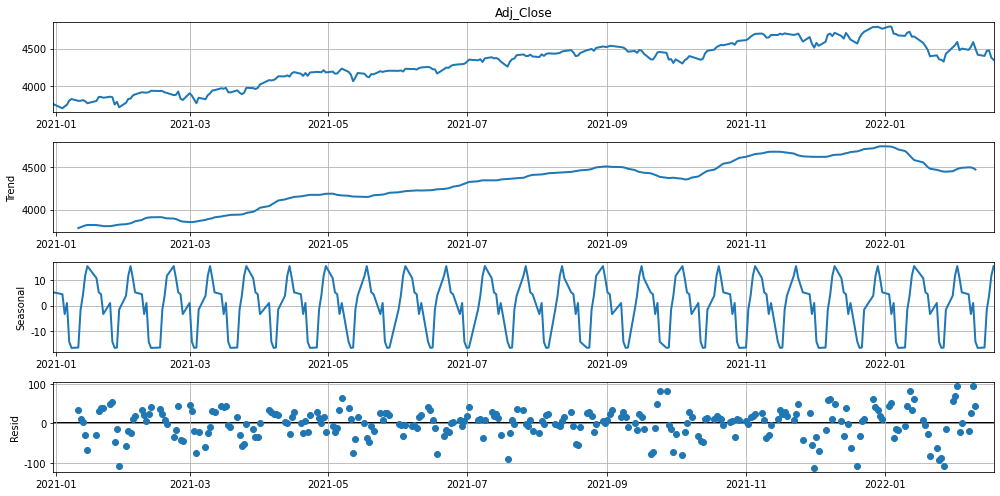

In [5]:
result = seasonal_decompose(df["Adj_Close"] , model="addictive",period=12)
plt.rcParams["figure.figsize"] = (14,7)
result.plot()
plt.show()


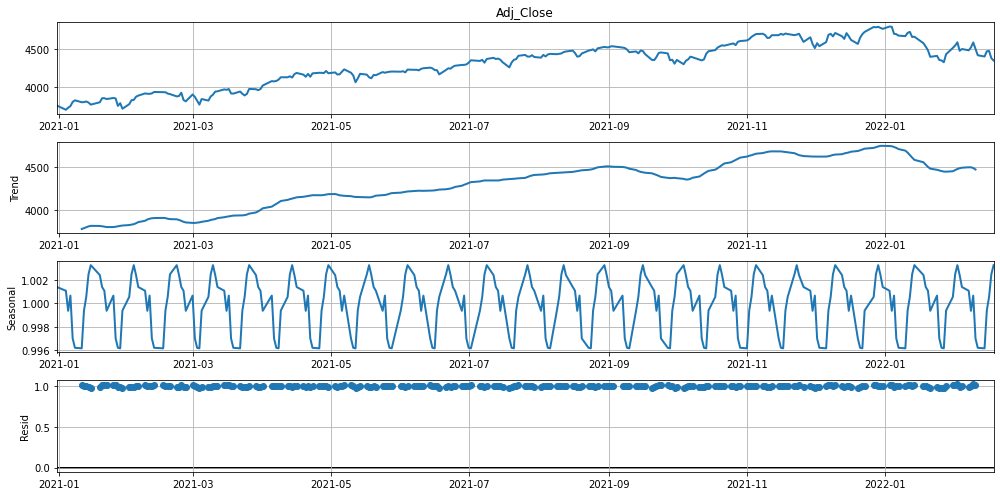

In [6]:
result = seasonal_decompose(df["Adj_Close"] , model="multiplicative",period=12)
plt.rcParams["figure.figsize"] = (14,7)
result.plot()
plt.show()
